<a href="https://colab.research.google.com/github/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/blob/main/Data_Collection_From_Twitter_For_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweet-preprocessor==0.6.0
!pip install tweepy==4.10.1
!pip install textblob==0.15.3
!pip install wordcloud==1.8.2.2
!pip install nltk==3.7
!pip install googletrans==4.0.0-rc1
!pip install PySastrawi==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https:/

In [2]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import re
import string 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
#Masukkan twitter token API
api_key = "UcVNXqPP4r4k10isPrN8Vv50J"
api_key_secret = "i7FyAvlWmVFaSE2ilPTnj51xKdZeh767exQ8ICHWJutUERntTk"
access_token = "907513785979592704-Dl1e8GTKqSZU6hAncjP6neOv2IZRpx1"
access_token_secret ="dC2BpeRVlgBQ7hWPt4hZjm9tSs0aB5DOd5doE3gEG9y9W"

# #Masukkan twitter token API
# api_key = "GbIGEYyXJW8RtX0KBxtzjNFWb"
# api_key_secret = "q47qwDYnsI9I6LAbifsQq5xULG4gYmiaOXD6iZZIjdKeNLXPT5"
# access_token = "847732131132358656-yvElNA1Ml5KM19Khl3CMNiMkb7Knk1Y"
# access_token_secret ="17KXZyRBfXmDK8UfsMozBnt3RP2C5vA8Rt8vA5rFHoUHY"

In [4]:
auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
def scraptweets(search_words, date_since, date_until,  numTweets):

    db_tweets = pd.DataFrame(columns=['tweetcreatedts', 'username', 'text', 'source'])

    tweets = tweepy.Cursor(
                    api.search_tweets, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items(numTweets)

    tweet_list = [tweet for tweet in tweets]

    for tweet in tweet_list:
        username = tweet.user.screen_name
        tweetcreatedts = tweet.created_at
        id_tweet = tweet.user.id
        source = tweet.source
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count

        try:
            text = tweet.retweeted_status.full_text.split()
        except AttributeError:
            text = tweet.full_text.split()

        ith_tweet = [tweetcreatedts, username, text, source]

        db_tweets.loc[len(db_tweets)] = ith_tweet
    
    print('Proses Scrapping Selesai Dengan Jumlah Data', len(db_tweets))
    filename = 'Data-hasil-crawling.csv'
    db_tweets.to_csv(filename, index=False)

today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(30)
last_week = last_week.strftime("%Y-%m-%d")

search_words = "gojek -filter:retweets"
date_since = last_week
date_until = today
numTweets = 500

scraptweets(search_words, date_since, date_until, numTweets)

Proses Scrapping Selesai Dengan Jumlah Data 500


In [31]:
data = pd.read_csv('Data-hasil-crawling.csv')
data

,tweetcreatedts,username,text,source
0,2023-02-28 23:55:01+00:00,gojekindonesia,"['@yvrfantasy', 'Hai', 'Kak,', 'untuk', 'saat'...",Salesforce - Social Studio
1,2023-02-28 23:52:01+00:00,mbaqso,"['mau', 'turun', 'naik', 'gojek', 'jg', 'motor...",Twitter for iPhone
2,2023-02-28 23:51:58+00:00,nblizza,"['sebenernya', 'pengen', 'komplain', 'sama', '...",Twitter for Android
3,2023-02-28 23:49:39+00:00,cleofave,"['@sbyfess', 'wkwkw', 'langsung', 'gojek', 'ae...",Twitter for Android
4,2023-02-28 23:49:11+00:00,unknwu,"['baru', 'jg', 'dikata', 'kemaren', 'ajg', 'pa...",Twitter for Android
...,...,...,...,...
495,2023-02-28 10:03:45+00:00,szadumppp,"['Mana', 'mau', 'jauh', 'dan', 'macet.', 'Mend...",Twitter for iPhone
496,2023-02-28 10:03:07+00:00,kumparan,"['Kejar', 'profit', 'di', '2023,', 'Gojek', 'b...",dlvr.it
497,2023-02-28 10:01:06+00:00,ikantidr,"['@tanyakanrl', 'Aku', 'beli', 'laptop', '6jt'...",Twitter for Android
498,2023-02-28 10:00:35+00:00,jiravly,"['@ceintauri', 'Abang', 'gojek', 'nya', 'lagi'...",Twitter for Android


In [32]:
#Mengganti format tanggal
tanggal = pd.to_datetime(data['tweetcreatedts'])
data['tweetcreatedts'] = tanggal.dt.strftime('%d/%m/%Y %H:%M')
data['tweetcreatedts']

0      28/02/2023 23:55
1      28/02/2023 23:52
2      28/02/2023 23:51
3      28/02/2023 23:49
4      28/02/2023 23:49
             ...       
495    28/02/2023 10:03
496    28/02/2023 10:03
497    28/02/2023 10:01
498    28/02/2023 10:00
499    28/02/2023 10:00
Name: tweetcreatedts, Length: 500, dtype: object

In [33]:
#Menghilangkan duplikat pada tweet
data = data.reset_index(drop=True).drop_duplicates(subset='text', keep="last", ignore_index=True)

In [34]:
# membuat fungsi untuk case folding
def casefolding(tweet_df):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    pattern1 = re.compile(r'pic.twitter.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweet_df = re.sub(pattern,' ',tweet_df)
    tweet_df = re.sub(pattern1,' ',tweet_df)
    #Convert to lower case
    tweet_df = tweet_df.lower()                                
     #Convert www.* or https?://*
    tweet_df = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet_df) 
    #Convert @username to AT_USER
    tweet_df = re.sub('@+','',tweet_df)
     #Remove additional white spaces
    tweet_df = re.sub('[\s]+', ' ', tweet_df)
    #Replace #word with word
    tweet_df  = re.sub(r'#([^\s]+)', r'\1', tweet_df )
    #remove symbols
    tweet_df = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',tweet_df)
    tweet_df = re.sub(r'[-+]?[0-9]+', '', tweet_df)       
    tweet_df = tweet_df.replace(',',' ').replace('.',' ')          
    tweet_df = re.sub(r'[^\w\s]', '', tweet_df)    
    #trim             
    tweet_df = tweet_df.strip('\'"')
    return tweet_df

In [35]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/main/Dataset/kamus-slang-ind.csv', encoding='ISO-8859-1')
def text_normalize(tweet_df):
    tweet_df = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
    if (key_norm['singkat'] == word).any()
    else word for word in tweet_df.split()
    ])
    tweet_df = str.lower(tweet_df)
    return tweet_df

In [36]:
stopwords_ind = stopwords.words('indonesian')
def remove_stop_word(tweet_df):
    clean_words = []
    tweet_df = tweet_df.split()
    for word in tweet_df:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [37]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tweet_df):
    tweet_df = stemmer.stem(tweet_df)
    return tweet_df

In [38]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing(tweet_df):
    tweet_df = casefolding(tweet_df)
    tweet_df = text_normalize(tweet_df)
    tweet_df = remove_stop_word(tweet_df)
    tweet_df = stemming(tweet_df)
    return tweet_df

data['text'] = data['text'].apply(text_preprocessing)

In [39]:
data

,tweetcreatedts,username,text,source
0,28/02/2023 23:55,gojekindonesia,yvrfantasy hai kak program benefit gopay membe...,Salesforce - Social Studio
1,28/02/2023 23:52,mbaqso,turun gojek motor jalan cpk,Twitter for iPhone
2,28/02/2023 23:51,nblizza,komplain macet ku rantau pakai gojek mana wwkk...,Twitter for Android
3,28/02/2023 23:49,cleofave,sbyfess wkwk langsung gojek poo peseno,Twitter for Android
4,28/02/2023 23:49,unknwu,kata kemarin anjing pagi gojek beat uf,Twitter for Android
...,...,...,...,...
489,28/02/2023 10:03,szadumppp,macet suruh gojek,Twitter for iPhone
490,28/02/2023 10:03,kumparan,kejar profit gojek kan strategi kumparantech,dlvr.it
491,28/02/2023 10:01,ikantidr,tanyakanrl beli laptop juta aman beli dionline...,Twitter for Android
492,28/02/2023 10:00,jiravly,ceintauri abang gojek nya senam,Twitter for Android


In [40]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['text'].apply(preprocessing_data)
data['tweet_clean'] = data['tweet_clean'].apply(tokenize_data)
data = data.drop_duplicates()

,tweetcreatedts,username,text,source,tweet_clean
0,28/02/2023 23:55,gojekindonesia,yvrfantasy hai kak program benefit gopay membe...,Salesforce - Social Studio,yvrfantasy hai kak program benefit gopay membe...
1,28/02/2023 23:52,mbaqso,turun gojek motor jalan cpk,Twitter for iPhone,turun gojek motor jalan cpk
2,28/02/2023 23:51,nblizza,komplain macet ku rantau pakai gojek mana wwkk...,Twitter for Android,komplain macet ku rantau pakai gojek mana wwkk...
3,28/02/2023 23:49,cleofave,sbyfess wkwk langsung gojek poo peseno,Twitter for Android,sbyfess wkwk langsung gojek poo peseno
4,28/02/2023 23:49,unknwu,kata kemarin anjing pagi gojek beat uf,Twitter for Android,kata kemarin anjing pagi gojek beat uf
...,...,...,...,...,...
489,28/02/2023 10:03,szadumppp,macet suruh gojek,Twitter for iPhone,macet suruh gojek
490,28/02/2023 10:03,kumparan,kejar profit gojek kan strategi kumparantech,dlvr.it,kejar profit gojek kan strategi kumparantech
491,28/02/2023 10:01,ikantidr,tanyakanrl beli laptop juta aman beli dionline...,Twitter for Android,tanyakanrl beli laptop juta aman beli dionline...
492,28/02/2023 10:00,jiravly,ceintauri abang gojek nya senam,Twitter for Android,ceintauri abang gojek nya senam


In [16]:
# Kalau time out ubah variabel translate
from googletrans import Translator
translator = Translator()

def convert_eng(tweet):
    return translator.translate(tweet, dest='en').text

data['tweet_english'] = data['tweet_clean'].apply(convert_eng)

<ipython-input-16-2e369f968ef9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_english'] = data['tweet_clean'].apply(convert_eng)


In [17]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

data['tweet_english'] = data['tweet_english'].apply(stemming_data)

<ipython-input-17-f7130a366d1c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_english'] = data['tweet_english'].apply(stemming_data)


In [18]:
# data_tweet = list(data['tweet_english'])
# polaritas = 0

# status = []
# total_positif = total_negatif = total_netral = total = 0

# def klasifikasi(polaritas):
#     if polaritas > 0.0:
#         return 'Positif'
#     elif polaritas > 0.0 == 0.0:
#         return 'Netral'
#     else:
#         return 'Negatif'

# for i, tweet in enumerate(data_tweet):
#     analysis = TextBlob(tweet)
#     polaritas += analysis.polarity

#     if analysis.sentiment.polarity > 0.0:
#         total_positif += 1
#         status.append('Positif')
#     elif analysis.sentiment.polarity == 0.0:
#         total_netral += 1
#         status.append('Netral')
#     else:
#         total_negatif += 1
#         status.append('Negatif')

#     total += 1 

# status = pd.DataFrame({'klasifikasi': status})
# data['klasifikasi'] = status
# data.tail()

# print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
# print(f'\nTotal Data : {total}')

In [19]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total = 0

def klasifikasi(polaritas):
    if polaritas > 0.0:
        return 'Positif'
    else:
        return 'Negatif'

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1 

status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 163
Negatif = 329

Total Data : 492


<ipython-input-19-6b718c92fec6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['klasifikasi'] = status


In [20]:
data.to_excel('Data-hasil-klasifikasi.xlsx', index=False)

In [21]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

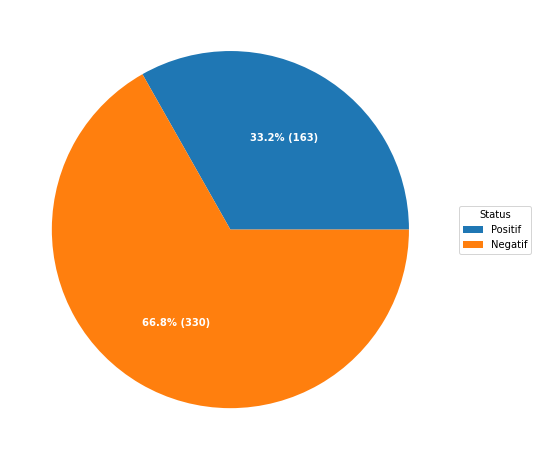

In [22]:
label = ['Positif', 'Negatif']
count_data = [total_positif+1, total_negatif+1]

show_pie(label, count_data, "Status")

In [23]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

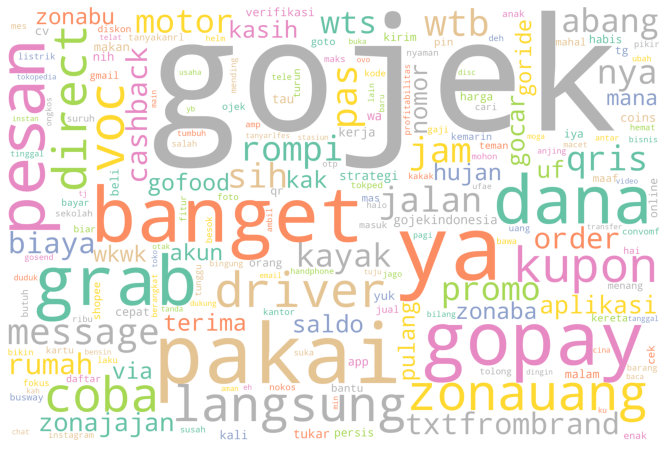

In [24]:
all_words = ' '.join([tweets for tweets in data['tweet_clean']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

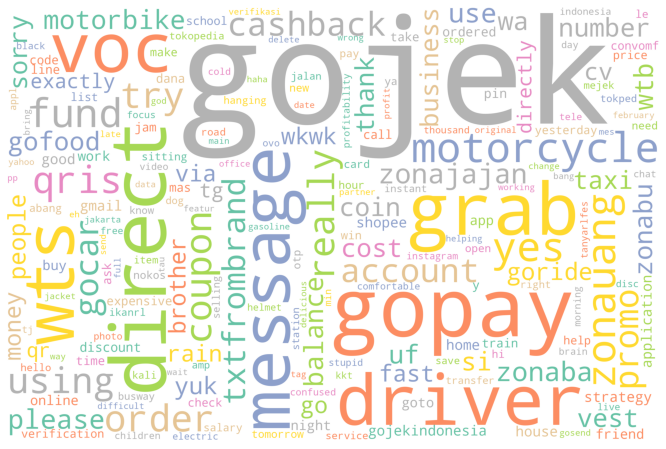

In [25]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [26]:
selectData = data[(data.klasifikasi == 'Positif')]
selectData.to_excel("Data-hasil-klasifikasi-positif.xlsx")